# Welcome to Jupyter!

In [1]:
!pip install pymongo[srv] dnspython 
!pip install homer-text
!pip install html5lib
!pip install lxml
!pip install beautifulsoup4
!pip install -U scikit-learn
!pip install wordcloud

     |████████████████████████████████| 531 kB 1.3 MB/s eta 0:00:01     |██████████████▏                 | 235 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 241 kB 36.7 MB/s eta 0:00:01
     |████████████████████████████████| 188 kB 37.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 13.4 MB/s eta 0:00:01     |████▎                           | 399 kB 13.4 MB/s eta 0:00:01     |███████████                     | 1.0 MB 13.4 MB/s eta 0:00:01     |████████████████████████████    | 2.6 MB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 2.0 MB/s eta 0:00:01     |█▋                              | 153 kB 2.0 MB/s eta 0:00:02     |███████████████▌                | 1.5 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 10.2 MB/s eta 0:00:01
  Created wheel for colorclass: filename=colorclass-2.2.0-py3-none-any.whl size=19394 sha256=038830cd6851f1f300615d8b9ba3dc0003983caa97cc2ffe1bb73ae2ec47e6cd
  Stored in directory: /ho

In [4]:
import os
import sys
import collections
import pandas as pd
import numpy as np
import nltk
import string
import requests
from bs4 import BeautifulSoup
import html5lib
import re
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('cmudict')
nltk.download('stopwords')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from homer.analyzer import Article
from homer.cmdline_printer import ArticlePrinter

pd.options.display.max_colwidth = 10000

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /home/jovyan/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def plot_word_freq(url):
    """Takes a url (from Project Gutenberg) and plots a word frequency
    distribution"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    
    # Remove ',', '/', '%', ':'
    text = re.sub(r'(\\d+[,/%:]?\\d*)', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove non-ASCII
    text = re.sub(r'[^\x00-\x7F]',' ', text)
    
    text = re.sub(r'[^\w\s]', '', text) 
    
    text = text.translate(string.punctuation).lower()
    
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(15)
    
    #Word Cloud chart
    wcloud = WordCloud().generate_from_frequencies(freqdist1)
    plt.imshow(wcloud , interpolation="bilinear")
    plt.axis("off")
    plt.rcParams["figure.figsize"] = (40,5)
    plt.show()

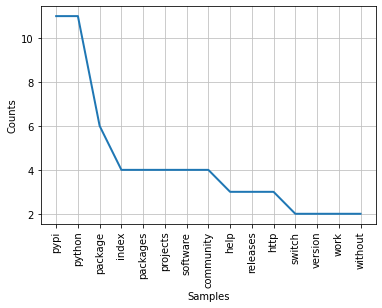

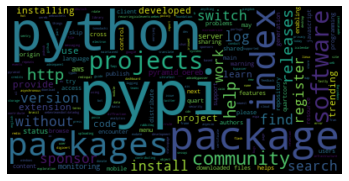

In [6]:
plot_word_freq('https://pypi.org/')

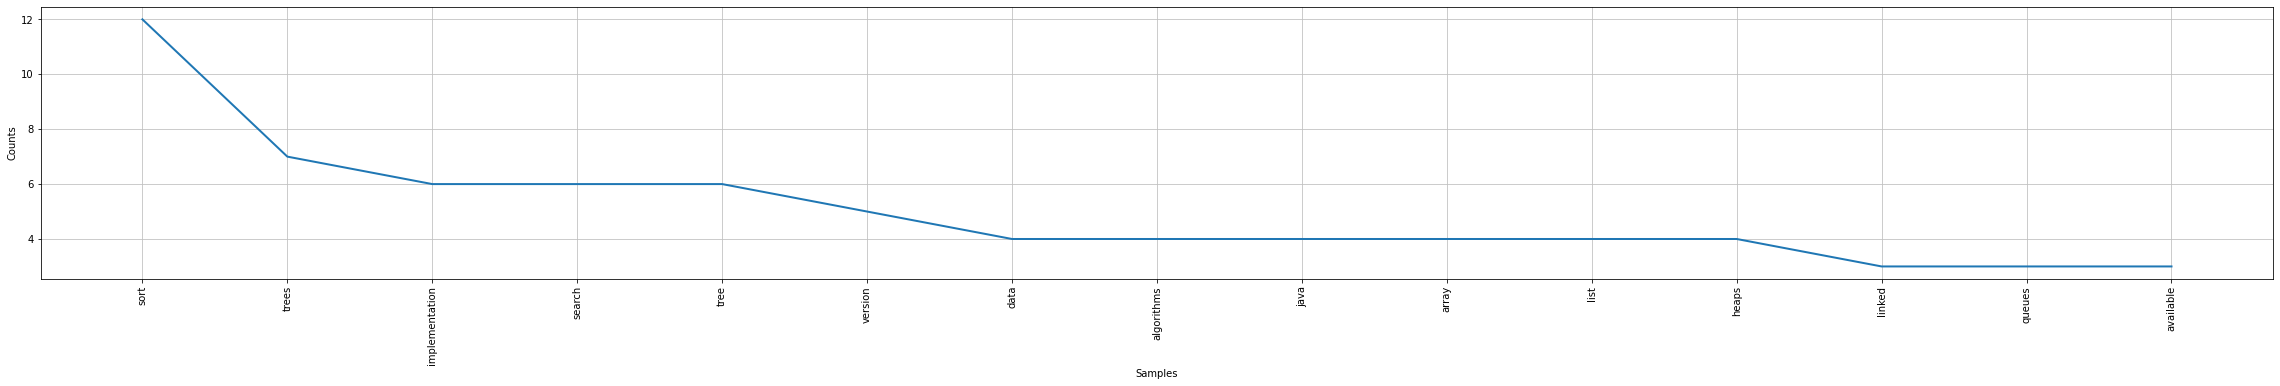

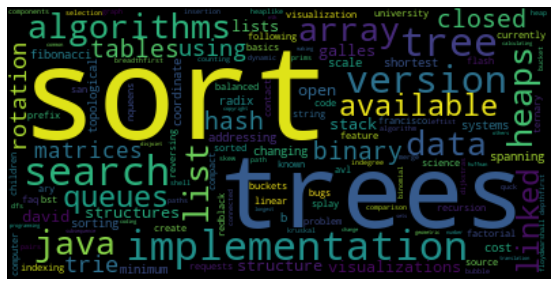

In [7]:
plot_word_freq('https://www.cs.usfca.edu/~galles/visualization/Algorithms.html')